In [0]:
from pyspark.sql.types import *
from pyspark.sql.functions import *
import pandas as pd
from pyspark.sql.functions import col, pandas_udf
from pyspark.sql.types import LongType

# Inspection of location of file

In [0]:
%fs ls dbfs:/FileStore/shared_uploads/xr97612@umbc.edu/region41_en.csv

path name size modificationTime dbfs:/FileStore/shared_uploads/xr97612@umbc.edu/region41_en.csv region41_en.csv 336866560 1683218433000

# Loading the Dataset

In [0]:
filePath = "dbfs:/FileStore/shared_uploads/xr97612@umbc.edu/region41_en.csv"
df = spark.read.csv(filePath, header="true", inferSchema="true", multiLine="true", escape='"')
df.display()

brand name bodyType color fuelType year mileage transmission power price vehicleConfiguration engineName engineDisplacement date location link parse_date Toyota Land Cruiser Prado jeep 5 doors blue Diesel 1995.0 168000.0 AT 130.0 1860000 3.0 SX Wide limited diesel turbo 1KZ-TE 3.0 LTR 2022-08-20T00:00:00.000+0000 Petropavlovsk-Kamchatskij https://petropavlovsk-kamchatskiy.drom.ru/toyota/land_cruiser_prado/47004996.html 2022-08-20T04:00:00.000+0000 Toyota Land Cruiser jeep 5 doors black Diesel null 260000.0 Automatic 286.0 2300000 null null null 2022-08-20T00:00:00.000+0000 Viljuchinsk https://vilyuchinsk.drom.ru/toyota/land_cruiser/46946902.html 2022-08-20T04:00:00.000+0000 Toyota Vitz hatchback 5 doors blue Gasoline 2019.0 100000.0 CVT 95.0 1075000 1.3 F Safety Edition III 4WD 1NR-FE 1.3 LTR 2022-08-20T00:00:00.000+0000 Petropavlovsk-Kamchatskij https://petropavlovsk-kamchatskiy.drom.ru/toyota/vitz/47580963.html 2022-08-20T04:00:00.000+0000 Toyota Mark II sedan grey Gasoline 2002.0 239000.0 AT 160.0 480000 2.0 Grande Four 1G-FE 2.0 LTR 2022-08-20T00:00:00.000+0000 Viljuchinsk https://vilyuchinsk.drom.ru/toyota/mark_ii/47725743.html 2022-08-20T04:00:00.000+0000 Toyota RAV4 jeep 5 doors golden Gasoline 2010.0 101000.0 AT 170.0 1450000 2.4 AT Long Престиж Плюс 2AZ-FE 2.4 LTR 2022-08-20T00:00:00.000+0000 Petropavlovsk-Kamchatskij https://petropavlovsk-kamchatskiy.drom.ru/toyota/rav4/47952121.html 2022-08-20T04:00:00.000+0000 Toyota Cresta sedan silver Gasoline null 1000000.0 AT 180.0 520000 null null null 2022-08-20T00:00:00.000+0000 Petropavlovsk-Kamchatskij https://petropavlovsk-kamchatskiy.drom.ru/toyota/cresta/47281486.html 2022-08-20T04:00:00.000+0000 Toyota Estima Emina minivan grey Diesel null 420000.0 AT 100.0 350000 null null null 2022-08-20T00:00:00.000+0000 Petropavlovsk-Kamchatskij https://petropavlovsk-kamchatskiy.drom.ru/toyota/estima_emina/47863052.html 2022-08-20T04:00:00.000+0000 Toyota Corolla Axio sedan grey Gasoline null 186000.0 CVT 105.0 550000 null null null 2022-08-20T00:00:00.000+0000 Petropavlovsk-Kamchatskij https://petropavlovsk-kamchatskiy.drom.ru/toyota/corolla_axio/47889006.html 2022-08-20T04:00:00.000+0000 Hummer H2 jeep 5 doors white Gasoline 2002.0 95000.0 AT 315.0 6777777 6.0 AT Luxury LQ4 6.0 LTR 2022-08-20T00:00:00.000+0000 Petropavlovsk-Kamchatskij https://petropavlovsk-kamchatskiy.drom.ru/hummer/h2/47544305.html 2022-08-20T04:00:00.000+0000 Mitsubishi Outlander jeep 5 doors beige Gasoline 2005.0 143000.0 CVT 170.0 929000 2.4 CVT Intense E63 4B12 2.4 LTR 2022-08-20T00:00:00.000+0000 Petropavlovsk-Kamchatskij https://petropavlovsk-kamchatskiy.drom.ru/mitsubishi/outlander/46039343.html 2022-08-20T04:00:00.000+0000 Subaru XV jeep 5 doors silver Gasoline 2015.0 95000.0 CVT 150.0 1760000 Hybrid 2.0i-L EyeSight 4WD FB20 2.0 LTR 2022-08-20T00:00:00.000+0000 Petropavlovsk-Kamchatskij https://petropavlovsk-kamchatskiy.drom.ru/subaru/xv/46313437.html 2022-08-20T04:00:00.000+0000 Toyota Land Cruiser Prado jeep 5 doors silver Gasoline 2000.0 232000.0 AT 185.0 1500000 3.4 TZ 4WD 5VZ-FE 3.4 LTR 2022-08-20T00:00:00.000+0000 Petropavlovsk-Kamchatskij https://petropavlovsk-kamchatskiy.drom.ru/toyota/land_cruiser_prado/47932736.html 2022-08-20T04:00:00.000+0000 Toyota Corolla station wagon white Gasoline null 150000.0 AT 110.0 200000 null null null 2022-08-20T00:00:00.000+0000 Petropavlovsk-Kamchatskij https://petropavlovsk-kamchatskiy.drom.ru/toyota/corolla/47949824.html 2022-08-20T04:00:00.000+0000 Subaru Trezia hatchback 5 doors blue Gasoline 2011.0 85000.0 CVT 103.0 880000 1.5 i Sports Limited 4WD 1NZ-FE 1.5 LTR 2022-08-20T00:00:00.000+0000 Petropavlovsk-Kamchatskij https://petropavlovsk-kamchatskiy.drom.ru/subaru/trezia/45744757.html 2022-08-20T04:00:00.000+0000 Lexus LS460 sedan black Gasoline null 225000.0 AT 380.0 850000 null null null 2022-08-20T00:00:00.000+0000 Petropavlovsk-Kamchatskij https://petropavlovsk-kamchatskiy.drom.ru/lexus/ls460/47915189.html 2022-08-20T04:00:00.000+0000 Toyota RAV4 jeep 

## Converting the date to required format

In [0]:
df = df.withColumn("dates", to_date("date",'yyyy-MM-dd').cast(DateType()))
df = df.drop("date",'parse_date','link',)

In [0]:
display(df)

brand name bodyType color fuelType year mileage transmission power price vehicleConfiguration engineName engineDisplacement location dates Toyota Land Cruiser Prado jeep 5 doors blue Diesel 1995.0 168000.0 AT 130.0 1860000 3.0 SX Wide limited diesel turbo 1KZ-TE 3.0 LTR Petropavlovsk-Kamchatskij 2022-08-20 Toyota Land Cruiser jeep 5 doors black Diesel null 260000.0 Automatic 286.0 2300000 null null null Viljuchinsk 2022-08-20 Toyota Vitz hatchback 5 doors blue Gasoline 2019.0 100000.0 CVT 95.0 1075000 1.3 F Safety Edition III 4WD 1NR-FE 1.3 LTR Petropavlovsk-Kamchatskij 2022-08-20 Toyota Mark II sedan grey Gasoline 2002.0 239000.0 AT 160.0 480000 2.0 Grande Four 1G-FE 2.0 LTR Viljuchinsk 2022-08-20 Toyota RAV4 jeep 5 doors golden Gasoline 2010.0 101000.0 AT 170.0 1450000 2.4 AT Long Престиж Плюс 2AZ-FE 2.4 LTR Petropavlovsk-Kamchatskij 2022-08-20 Toyota Cresta sedan silver Gasoline null 1000000.0 AT 180.0 520000 null null null Petropavlovsk-Kamchatskij 2022-08-20 Toyota Estima Emina minivan grey Diesel null 420000.0 AT 100.0 350000 null null null Petropavlovsk-Kamchatskij 2022-08-20 Toyota Corolla Axio sedan grey Gasoline null 186000.0 CVT 105.0 550000 null null null Petropavlovsk-Kamchatskij 2022-08-20 Hummer H2 jeep 5 doors white Gasoline 2002.0 95000.0 AT 315.0 6777777 6.0 AT Luxury LQ4 6.0 LTR Petropavlovsk-Kamchatskij 2022-08-20 Mitsubishi Outlander jeep 5 doors beige Gasoline 2005.0 143000.0 CVT 170.0 929000 2.4 CVT Intense E63 4B12 2.4 LTR Petropavlovsk-Kamchatskij 2022-08-20 Subaru XV jeep 5 doors silver Gasoline 2015.0 95000.0 CVT 150.0 1760000 Hybrid 2.0i-L EyeSight 4WD FB20 2.0 LTR Petropavlovsk-Kamchatskij 2022-08-20 Toyota Land Cruiser Prado jeep 5 doors silver Gasoline 2000.0 232000.0 AT 185.0 1500000 3.4 TZ 4WD 5VZ-FE 3.4 LTR Petropavlovsk-Kamchatskij 2022-08-20 Toyota Corolla station wagon white Gasoline null 150000.0 AT 110.0 200000 null null null Petropavlovsk-Kamchatskij 2022-08-20 Subaru Trezia hatchback 5 doors blue Gasoline 2011.0 85000.0 CVT 103.0 880000 1.5 i Sports Limited 4WD 1NZ-FE 1.5 LTR Petropavlovsk-Kamchatskij 2022-08-20 Lexus LS460 sedan black Gasoline null 225000.0 AT 380.0 850000 null null null Petropavlovsk-Kamchatskij 2022-08-20 Toyota RAV4 jeep 5 doors white Gasoline 2012.0 175000.0 Manual 146.0 1590000 2.0 MT 4WD Комфорт 3ZR-FE 2.0 LTR Petropavlovsk-Kamchatskij 2022-08-20 Mitsubishi Pajero jeep 5 doors white Gasoline 2010.0 156000.0 Manual 178.0 1565000 3.0 long GR 4WD 6G72 3.0 LTR Elizovo 2022-08-20 Lexus LX570 jeep 5 doors grey Gasoline 2007.0 160000.0 AT 383.0 3300000 5.7 AT 3UR-FE 5.7 LTR Petropavlovsk-Kamchatskij 2022-08-20 Toyota Land Cruiser Prado jeep 3 doors grey Gasoline 2005.0 115000.0 AT 163.0 1800000 2.7 Prado RX 2TR-FE 2.7 LTR Petropavlovsk-Kamchatskij 2022-08-20 Isuzu Wizard jeep 5 doors white Gasoline 2000.0 300000.0 AT 215.0 800000 3.2 LSE 6VD1 3.2 LTR Petropavlovsk-Kamchatskij 2022-08-20 Toyota Land Cruiser Prado jeep 5 doors white Gasoline 2013.0 91000.0 AT 163.0 3135000 2.7 TX 7 seat 4WD 2TR-FE 2.7 LTR Petropavlovsk-Kamchatskij 2022-08-20 Toyota Land Cruiser Cygnus jeep 5 doors black Gasoline 2003.0 209000.0 AT 235.0 1870000 4.7 4WD 2UZ-FE 4.7 LTR Petropavlovsk-Kamchatskij 2022-08-20 Mitsubishi Outlander jeep 5 doors white Gasoline 2017.0 25000.0 CVT 146.0 2490000 2.0 CVT 4WD Instyle 4B11 2.0 LTR Petropavlovsk-Kamchatskij 2022-08-20 Honda Torneo sedan grey Gasoline 2000.0 280000.0 AT 148.0 295000 2.0 VTS F20B 2.0 LTR Petropavlovsk-Kamchatskij 2022-08-20 Toyota Vista sedan grey Gasoline 1998.0 285000.0 AT 135.0 375000 2.0 N200 3S-FE 2.0 LTR Petropavlovsk-Kamchatskij 2022-08-20 Nissan Pathfinder jeep 5 doors black Diesel 2009.0 212000.0 AT 190.0 735000 2.5 dCi AT LE YD25DDTi 2.5 LTR Petropavlovsk-Kamchatskij 2022-08-20 Kia Sportage jeep 5 doors grey Gasoline 2010.0 55000.0 AT 150.0 1350000 2.0 AT 4WD Luxe G4KD 2.0 LTR Petropavlovsk-Kamchatskij 2022-08-20 Toyota Verossa sedan white Gasoline null 200000.0 AT 160.0 570000 null null null Petropavlovsk-Kamchatskij 2022-08-20 

## Finding the datatypes of the each column

In [0]:
df.dtypes

Out[97]: [('brand', 'string'),
 ('name', 'string'),
 ('bodyType', 'string'),
 ('color', 'string'),
 ('fuelType', 'string'),
 ('year', 'double'),
 ('mileage', 'double'),
 ('transmission', 'string'),
 ('power', 'double'),
 ('price', 'int'),
 ('vehicleConfiguration', 'string'),
 ('engineName', 'string'),
 ('engineDisplacement', 'string'),
 ('location', 'string'),
 ('dates', 'date')]

## Calculating the null% of each column

In [0]:
null_counts = {col: df.filter(df[col].isNull()).count() for col in df.columns}

nulls_df = spark.createDataFrame(list(zip(null_counts.keys(),null_counts.values())),['Columns','Count'])
nulls_df = nulls_df.withColumn('null%',round((nulls_df['Count']/df.count())*100,2))
display(nulls_df)

Columns Count null% brand 0 0.0 name 0 0.0 bodyType 0 0.0 color 49806 3.32 fuelType 6595 0.44 year 583041 38.9 mileage 6864 0.46 transmission 7401 0.49 power 14240 0.95 price 0 0.0 vehicleConfiguration 583041 38.9 engineName 583234 38.91 engineDisplacement 583874 38.96 location 0 0.0 dates 0 0.0

Databricks visualization. Run in Databricks to view.

## Replacing the nulls with mode for categorical columns

In [0]:
color_mode_value = df.groupby("color").count().orderBy("count", ascending=False).first()[0]
df = df.withColumn("color", when(col("color").isNull(), color_mode_value).otherwise(col("color")))

fuelType_mode_value = df.groupby("fuelType").count().orderBy("count", ascending=False).first()[0]
df = df.withColumn("fuelType", when(col("fuelType").isNull(), fuelType_mode_value).otherwise(col("fuelType")))

transmission_mode_value = df.groupby("transmission").count().orderBy("count", ascending=False).first()[0]
df = df.withColumn("transmission", when(col("transmission").isNull(), transmission_mode_value).otherwise(col("transmission")))

## Replacing the nulls with median for numerical columns

In [0]:
mileage_median_value =  df.approxQuantile("mileage", [0.5], 0.25)[0]
df = df.withColumn("mileage", when(col("mileage").isNull(), mileage_median_value).otherwise(col("mileage")))

power_median_value = df.approxQuantile("power", [0.5], 0.25)[0]
df = df.withColumn("power", when(col("power").isNull(), power_median_value).otherwise(col("power")))

In [0]:
from pyspark.sql import DataFrame
power_median = df.approxQuantile("power", [0.5], 0.25)
mileage_median = df.approxQuantile("mileage", [0.5], 0.25)

## Converting Price from Rubel to USD

In [0]:
#from pyspark.sql.functions import pandas_udf, PandasUDFType

def price_usd(Price: pd.Series) -> pd.Series:
    # 1USD = 77.8 rubel
    s = Price/77.8
    return s.round(2)

price_usd_udf = pandas_udf(price_usd, returnType=DoubleType())

df = df.withColumn('price_usd',price_usd_udf(col('price')))
df = df.drop("price")

## Replacing nulls with 'Unknown' and '0' for the columns whose  nulls percent is greater than 35

In [0]:
df = df.withColumn("vehicleConfiguration", when(col("vehicleConfiguration").isNull(), 'Unknown').otherwise(col("vehicleConfiguration")))
df = df.withColumn("engineName", when(col("engineName").isNull(),'Unknown').otherwise(col("engineName")))
df = df.withColumn("engineDisplacement", when(col("engineDisplacement").isNull(), 'Unknown').otherwise(col("engineDisplacement")))
df = df.withColumn("year", when(col("year").isNull(), 0).otherwise(col("year")))

## Checking for nulls after data cleaning

In [0]:
null_counts = {col: df.filter(df[col].isNull()).count() for col in df.columns}

nulls_df = spark.createDataFrame(list(zip(null_counts.keys(),null_counts.values())),['Columns','Count'])
nulls_df = nulls_df.withColumn('null%',round((nulls_df['Count']/df.count())*100,2))
display(nulls_df)

Columns Count null% brand 0 0.0 name 0 0.0 bodyType 0 0.0 color 0 0.0 fuelType 0 0.0 year 0 0.0 mileage 0 0.0 transmission 0 0.0 power 0 0.0 vehicleConfiguration 0 0.0 engineName 0 0.0 engineDisplacement 0 0.0 location 0 0.0 dates 0 0.0 price_usd 0 0.0

## Drop exixting table in database

In [0]:
dbutils.fs.rm("dbfs:/user/hive/warehouse/russiancars", True)

Out[105]: True

## Saving dataframe into a table

In [0]:
df.write.format("parquet").mode("overwrite").saveAsTable("RussianCars")

In [0]:
%sql
CACHE TABLE RussianCars

In [0]:
%sql
SELECT * FROM RussianCars LIMIT 10

brand name bodyType color fuelType year mileage transmission power vehicleConfiguration engineName engineDisplacement location dates price_usd Toyota Land Cruiser Prado jeep 5 doors blue Diesel 1995.0 168000.0 AT 130.0 3.0 SX Wide limited diesel turbo 1KZ-TE 3.0 LTR Petropavlovsk-Kamchatskij 2022-08-20 23907.46 Toyota Land Cruiser jeep 5 doors black Diesel 0.0 260000.0 Automatic 286.0 Unknown Unknown Unknown Viljuchinsk 2022-08-20 29562.98 Toyota Vitz hatchback 5 doors blue Gasoline 2019.0 100000.0 CVT 95.0 1.3 F Safety Edition III 4WD 1NR-FE 1.3 LTR Petropavlovsk-Kamchatskij 2022-08-20 13817.48 Toyota Mark II sedan grey Gasoline 2002.0 239000.0 AT 160.0 2.0 Grande Four 1G-FE 2.0 LTR Viljuchinsk 2022-08-20 6169.67 Toyota RAV4 jeep 5 doors golden Gasoline 2010.0 101000.0 AT 170.0 2.4 AT Long Престиж Плюс 2AZ-FE 2.4 LTR Petropavlovsk-Kamchatskij 2022-08-20 18637.53 Toyota Cresta sedan silver Gasoline 0.0 1000000.0 AT 180.0 Unknown Unknown Unknown Petropavlovsk-Kamchatskij 2022-08-20 6683.8 Toyota Estima Emina minivan grey Diesel 0.0 420000.0 AT 100.0 Unknown Unknown Unknown Petropavlovsk-Kamchatskij 2022-08-20 4498.71 Toyota Corolla Axio sedan grey Gasoline 0.0 186000.0 CVT 105.0 Unknown Unknown Unknown Petropavlovsk-Kamchatskij 2022-08-20 7069.41 Hummer H2 jeep 5 doors white Gasoline 2002.0 95000.0 AT 315.0 6.0 AT Luxury LQ4 6.0 LTR Petropavlovsk-Kamchatskij 2022-08-20 87117.96 Mitsubishi Outlander jeep 5 doors beige Gasoline 2005.0 143000.0 CVT 170.0 2.4 CVT Intense E63 4B12 2.4 LTR Petropavlovsk-Kamchatskij 2022-08-20 11940.87

In [0]:
df.columns

Out[108]: ['brand',
 'name',
 'bodyType',
 'color',
 'fuelType',
 'year',
 'mileage',
 'transmission',
 'power',
 'vehicleConfiguration',
 'engineName',
 'engineDisplacement',
 'location',
 'dates',
 'price_usd']

## Top 10 car brands that are listed on car resale websites in Russia

In [0]:
%sql
select brand,count(brand) as no_of_cars from RussianCars group by brand order by no_of_cars desc limit 10;

brand no_of_cars Toyota 645720 Nissan 160840 Honda 142936 Mitsubishi 112583 Suzuki 94009 Lexus 86508 Subaru 85959 Mazda 24295 Mercedes-Benz 17792 Daihatsu 17608

Databricks visualization. Run in Databricks to view.

## Contribution of each fueltype

In [0]:
%sql
select fuelType,count(fuelType) as counts from RussianCars group by fuelType;

fuelType counts Gasoline 1290178 Diesel 207345 Electro 1217

Databricks visualization. Run in Databricks to view.

## Contribution of fuelType for each car brand

In [0]:
df.select('*').groupby('brand','fuelType').count().display()

brand fuelType count Hummer Gasoline 2977 Infiniti Gasoline 11705 Lexus Gasoline 85252 Mitsubishi Diesel 28354 Honda Gasoline 142936 Porsche Gasoline 1694 Isuzu Diesel 6241 Maserati Gasoline 577 Daihatsu Gasoline 17175 Volvo Gasoline 356 Dodge Diesel 484 Peugeot Diesel 420 SsangYong Gasoline 1070 UAZ Gasoline 11265 BMW Gasoline 5023 Renault Gasoline 1848 Audi Gasoline 1793 Nissan Gasoline 125735 Mazda Gasoline 21920 Cadillac Gasoline 327 Kia Diesel 2642 Daewoo Gasoline 435 Subaru Gasoline 85959 Ford Gasoline 4554 Land Rover Gasoline 2235 Jeep Gasoline 4041 SsangYong Diesel 5132 BMW Diesel 397 Hyundai Diesel 1061 Kia Gasoline 3565 Chevrolet Gasoline 3395 Mazda Diesel 2375 Moskvich Gasoline 1147 Nissan Diesel 33888 Lexus Diesel 1256 Mercedes-Benz Gasoline 16026 GMC Gasoline 177 Volkswagen Gasoline 1448 Volkswagen Diesel 397 Hyundai Gasoline 2160 Land Rover Diesel 699 Mitsubishi Gasoline 84229 Lamborghini Gasoline 193 Suzuki Diesel 236 Acura Gasoline 2007 Lada Gasoline 15509 Mercedes-Benz Diesel 1766 Peugeot Gasoline 459 GAZ Gasoline 1869 Daihatsu Diesel 433 Toyota Gasoline 528266 Suzuki Gasoline 93773 Chrysler Gasoline 528 Opel Gasoline 396 Daewoo Diesel 575 Nissan Electro 1217 Toyota Diesel 117454 Isuzu Gasoline 4268 Other Gasoline 502 Ford Diesel 2363 Dodge Gasoline 1384 UAZ Diesel 1172

Databricks visualization. Run in Databricks to view.

## Distribution of Mileage

<Figure size 720x720 with 0 Axes>

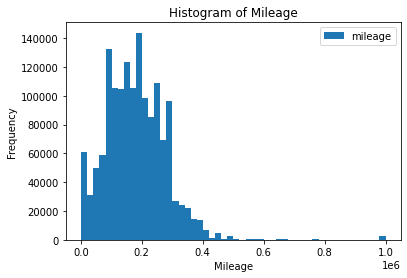

In [0]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert the PySpark dataframe to a Pandas dataframe
pdf = df.select("mileage").toPandas()
plt.figure(figsize=(10, 10))
# Plot the histogram
pdf.plot.hist(bins=50)

# Set title and axis labels
plt.title("Histogram of Mileage")
plt.xlabel("Mileage")
plt.ylabel("Frequency")
plt.show()


## Distribution of Price

In [0]:
display(df.select(col('price_usd')))

price_usd 23907.46 29562.98 13817.48 6169.67 18637.53 6683.8 4498.71 7069.41 87117.96 11940.87 22622.11 19280.21 2570.69 11311.05 10925.45 20437.02 20115.68 42416.45 23136.25 10282.78 40295.63 24035.99 32005.14 3791.77 4820.05 9447.3 17352.19 7326.48 30848.33 29562.98 10282.78 49293.06 74421.59 43701.8 37275.06 61053.98 11503.86 10218.51 22107.97 23778.92 13496.14 25128.53 30205.66 37917.74 77120.82 33161.95 76478.15 13496.14 25706.94 64267.35 45886.89 36889.46 30205.66 42275.06 19023.14 83547.56 42416.45 12853.47 2313.62 31233.93 5976.86 34447.3 33547.56 73251.93 74164.52 16709.51 16452.44 51928.02 22622.11 22493.57 8997.42 3856.04 12982.01 16195.37 8354.76 23136.25 7519.28 154241.65 23007.71 7712.08 39813.62 6426.74 10539.85 66838.05 8354.76 109241.65 10282.78 16709.51 22622.11 4177.38 5784.06 5398.46 21850.9 18380.46 19280.21 32133.68 6426.74 8097.69 5655.53 4755.78 3213.37 13367.61 10925.45 5784.06 7326.48 16709.51 13496.14 59125.96 14781.49 4241.65 2570.69 9125.96 5784.06 9640.1 3084.83 32776.35 47557.84 8419.02 7005.14 3856.04 16066.84 5784.06 29948.59 3341.9 15424.16 3213.37 11568.12 9640.1 2763.5 4884.32 12596.4 36632.39 2956.3 2956.3 5398.46 23136.25 12789.2 11439.59 19280.21 20565.55 28563.26 5141.39 6683.8 23778.92 3213.37 17994.86 1285.35 7455.01 8290.49 4498.71 8611.83 10269.92 4305.91 8997.43 5398.46 9383.03 9640.1 3213.37 2827.76 92544.99 14781.49 14845.76 10925.45 5784.06 578.41 7712.08 14845.76 8997.43 17352.19 8097.69 12853.47 1285.35 7262.21 2763.5 4498.71 5784.06 2956.3 32133.68 2249.36 7069.41 2956.3 5784.06 15424.16 14138.82 964.01 1092.54 11825.19 43059.13 88688.95 62339.33 59768.64 55912.6 54627.25 49485.86 44344.47 6426.74 43701.8 40488.43 59125.96 57197.94 46272.49 50771.21 49485.86 5912.6 46915.17 40488.43 16709.51 40488.43 36632.39 37917.74 36632.39 36632.39 36632.39 36632.39 79691.52 59125.96 23778.92 7712.08 1349.61 6041.13 12853.47 24035.99 8354.76 11825.19 2056.56 14267.35 14074.55 50771.21 3598.97 15424.16 32776.35 21465.3 12853.47 4370.18 5269.92 1799.49 29562.98 7583.55 7647.81 18251.93 9640.09 6426.74 3084.83 1799.49 4691.52 51413.88 2313.62 9897.17 7969.15 8868.89 14138.82 29562.98 17352.19 32776.35 10269.92 1928.02 8290.49 40488.43 18637.53 5784.06 10154.24 13496.14 4370.18 8354.76 17609.25 10539.85 32133.68 32390.75 10282.78 7712.08 4241.65 7712.08 19280.21 1285.35 14138.82 8740.36 9640.1 3213.37 8354.76 5141.39 3213.37 17866.32 4498.71 29562.98 21208.23 1285.35 6426.74 1478.15 2056.56 2185.09 4113.11 5012.85 7069.41 5185.14 6362.47 21465.3 10025.71 10925.45 9640.1 8354.76 8933.16 11568.12 2570.69 5784.06 8997.43 5912.6 5784.06 30205.66 8868.89 8997.43 8740.36 50128.53 2249.36 8161.95 92544.99 39845.76 8611.83 18637.53 5655.53 2699.23 4820.05 19280.21 6041.13 11439.59 14781.49 3341.9 6169.67 28277.63 17480.72 2570.69 2185.09 34061.7 22879.18 21850.89 23778.92 9640.1 10282.78 30719.79 12210.8 12467.87 7660.66 20565.55 5912.6 2570.69 4627.25 3213.37 8611.83 3598.97 1670.95 7326.48 17866.32 5012.85 4884.32 21850.9 5077.12 16709.51 25706.94 4434.45 100257.07 4820.05 6041.13 12210.8 835.48 5012.85 6940.87 5012.85 4498.71 11568.12 44987.15 10025.71 44987.15 3213.37 12210.8 7699.23 33676.09 11953.73 2056.56 1028.28 19280.21 25449.87 1863.75 8354.76 65552.7 8226.22 10282.78 1542.42 29305.91 5784.06 2956.3 38560.41 17544.99 22493.57 3856.04 4498.71 21850.9 25706.94 2120.82 3084.83 47557.84 12853.47 16066.83 37275.06 5848.33 39203.08 5784.06 14138.82 11568.12 5141.39 8354.76 11568.12 4884.32 12210.8 22107.97 49871.47 103470.44 199871.47 6812.34 3856.04 385.6 3213.37 21850.9 8995.99 5912.58 8183.37 4284.49 4284.49 5912.58 24421.59 8354.76 5655.53 11696.66 2358.61 10154.24 4498.71 15874.04 14138.82 17223.65 4241.65 16966.58 9640.1 8997.43 8997.43 14781.49 3213.37 1606.68 16709.51 2313.62 3213.37 27570.69 12853.46 14267.35 4113.11 3406.17 20565.55 7390.75 4434.45 24035.99 3856.04 7069.41 12210.8 7069.41 4498.71 46272.49 7069.41 42634.96 2056.56 2056.56 10025.71 23778.92 10925.45 5141.39 10025.71 13881

Databricks visualization. Run in Databricks to view.

<Figure size 720x720 with 0 Axes>

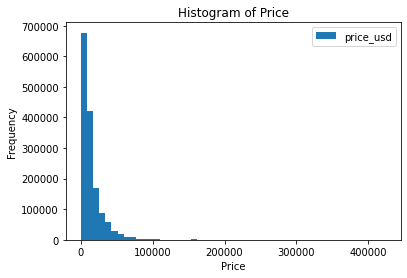

In [0]:
pdf = df.select(col('price_usd')).toPandas()
plt.figure(figsize=(10, 10))
# Plot the histogram
pdf.plot.hist(bins=50)

# Set title and axis labels
plt.title("Histogram of Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

## Average Price for each car brand

In [0]:
df.select(col('brand'),col('price_usd')).groupby(col('brand')).agg(round(mean('price_usd'),2).alias('Avg Price')).orderBy(desc('Avg Price')).display()

brand Avg Price Lamborghini 424164.52 Maserati 70580.48 Jeep 45350.23 Lexus 41584.2 Hummer 39243.52 Mercedes-Benz 35933.07 Dodge 23980.21 Cadillac 23065.5 Porsche 20894.63 Ford 19211.8 Hyundai 18627.8 Kia 18064.88 Land Rover 17839.97 Volkswagen 17388.41 BMW 17132.29 GMC 15424.16 Toyota 15059.79 Infiniti 14988.89 Audi 13640.75 Mitsubishi 13602.25 Acura 12957.67 Volvo 12853.47 Subaru 11874.53 Honda 9761.94 Nissan 9476.01 Suzuki 8729.24 Other 8664.06 UAZ 8160.01 Peugeot 7810.79 Chevrolet 7323.43 Mazda 7144.17 Isuzu 6831.96 SsangYong 6627.08 Daewoo 6515.82 Daihatsu 5594.17 Chrysler 5215.27 Renault 5134.92 Lada 4587.22 GAZ 2717.98 Opel 1356.92 Moskvich 985.92

Databricks visualization. Run in Databricks to view.

## Average Mileage for each car brand

In [0]:
df.select(col('brand'),col('mileage')).groupby(col('brand')).agg(round(mean('mileage'),2).alias('Avg Mileage')).orderBy('Avg Mileage').display()

brand Avg Mileage Lamborghini 1000.0 Maserati 44000.0 Jeep 84258.1 GAZ 103564.47 Chrysler 105890.15 Lada 108712.43 Hyundai 123384.04 Kia 123662.8 UAZ 127131.78 Daihatsu 136684.75 Daewoo 138346.53 Acura 144651.22 Lexus 147989.49 Ford 152613.56 Hummer 153561.64 Chevrolet 154257.44 Porsche 154433.29 Moskvich 155784.66 Other 156300.8 Suzuki 162808.98 Audi 166775.79 SsangYong 167179.62 Infiniti 168312.0 Volkswagen 168821.14 Honda 169295.24 Subaru 170354.23 Land Rover 176290.05 BMW 179806.09 Dodge 180218.42 Mitsubishi 180894.3 Nissan 189265.2 Toyota 196882.79 Peugeot 199556.31 Mazda 203192.92 Mercedes-Benz 207785.58 Volvo 223000.0 Cadillac 237000.0 Isuzu 249415.64 Opel 285818.18 GMC 306000.0 Renault 393084.42

Databricks visualization. Run in Databricks to view.

## Ads of cars of the period of the time

In [0]:
df.select(col('dates'),col('brand')).groupby(col('dates'),col('brand')).count().orderBy('dates','brand').display()

dates brand count 2022-08-03 Honda 10 2022-08-03 Lada 5 2022-08-03 Lexus 1 2022-08-03 Mitsubishi 5 2022-08-03 Nissan 25 2022-08-03 Porsche 5 2022-08-03 Subaru 15 2022-08-03 Suzuki 15 2022-08-03 Toyota 81 2022-08-03 UAZ 5 2022-08-04 Daihatsu 24 2022-08-04 Ford 7 2022-08-04 Honda 206 2022-08-04 Infiniti 29 2022-08-04 Isuzu 6 2022-08-04 Lada 8 2022-08-04 Lexus 76 2022-08-04 Mitsubishi 43 2022-08-04 Nissan 102 2022-08-04 Other 8 2022-08-04 Subaru 107 2022-08-04 Suzuki 93 2022-08-04 Toyota 475 2022-08-05 Honda 580 2022-08-05 Infiniti 74 2022-08-05 Isuzu 68 2022-08-05 Land Rover 29 2022-08-05 Lexus 65 2022-08-05 Mazda 69 2022-08-05 Mercedes-Benz 34 2022-08-05 Mitsubishi 264 2022-08-05 Nissan 313 2022-08-05 SsangYong 35 2022-08-05 Subaru 357 2022-08-05 Suzuki 305 2022-08-05 Toyota 1243 2022-08-06 Acura 53 2022-08-06 Audi 57 2022-08-06 Daihatsu 53 2022-08-06 Ford 61 2022-08-06 GAZ 58 2022-08-06 Honda 506 2022-08-06 Hummer 59 2022-08-06 Isuzu 59 2022-08-06 Lexus 296 2022-08-06 Mazda 112 2022-08-06 Mercedes-Benz 58 2022-08-06 Mitsubishi 116 2022-08-06 Nissan 559 2022-08-06 Subaru 275 2022-08-06 Suzuki 121 2022-08-06 Toyota 1933 2022-08-06 UAZ 55 2022-08-06 Volkswagen 55 2022-08-07 Daihatsu 141 2022-08-07 Ford 64 2022-08-07 Honda 952 2022-08-07 Infiniti 106 2022-08-07 Kia 66 2022-08-07 Lada 121 2022-08-07 Lexus 304 2022-08-07 Mazda 268 2022-08-07 Mitsubishi 422 2022-08-07 Nissan 604 2022-08-07 SsangYong 77 2022-08-07 Subaru 564 2022-08-07 Suzuki 734 2022-08-07 Toyota 2622 2022-08-07 UAZ 77 2022-08-08 Audi 83 2022-08-08 Chevrolet 83 2022-08-08 Daihatsu 247 2022-08-08 GAZ 81 2022-08-08 Honda 1064 2022-08-08 Infiniti 83 2022-08-08 Isuzu 79 2022-08-08 Jeep 83 2022-08-08 Lada 242 2022-08-08 Land Rover 80 2022-08-08 Lexus 381 2022-08-08 Mercedes-Benz 78 2022-08-08 Mitsubishi 902 2022-08-08 Nissan 1488 2022-08-08 Subaru 514 2022-08-08 Suzuki 402 2022-08-08 Toyota 5494 2022-08-09 Honda 637 2022-08-09 Infiniti 97 2022-08-09 Lada 264 2022-08-09 Lexus 350 2022-08-09 Mazda 448 2022-08-09 Mercedes-Benz 461 2022-08-09 Mitsubishi 710 2022-08-09 Nissan 1271 2022-08-09 Porsche 97 2022-08-09 Subaru 616 2022-08-09 Suzuki 618 2022-08-09 Toyota 3875 2022-08-09 UAZ 97 2022-08-10 Daihatsu 109 2022-08-10 Ford 222 2022-08-10 Honda 1222 2022-08-10 Hyundai 119 2022-08-10 Infiniti 16 2022-08-10 Lada 224 2022-08-10 Lexus 432 2022-08-10 Maserati 119 2022-08-10 Mercedes-Benz 103 2022-08-10 Mitsubishi 570 2022-08-10 Nissan 1744 2022-08-10 Subaru 210 2022-08-10 Suzuki 638 2022-08-10 Toyota 5519 2022-08-10 Volkswagen 111 2022-08-11 Daewoo 121 2022-08-11 Daihatsu 122 2022-08-11 Ford 134 2022-08-11 Honda 2032 2022-08-11 Isuzu 120 2022-08-11 Kia 123 2022-08-11 Lexus 273 2022-08-11 Mazda 243 2022-08-11 Mercedes-Benz 266 2022-08-11 Mitsubishi 750 2022-08-11 Nissan 2040 2022-08-11 Subaru 1131 2022-08-11 Suzuki 892 2022-08-11 Toyota 5122 2022-08-11 UAZ 250 2022-08-11 Volkswagen 131 2022-08-12 Acura 146 2022-08-12 BMW 144 2022-08-12 Cadillac 145 2022-08-12 Chevrolet 83 2022-08-12 Daihatsu 296 2022-08-12 GAZ 149 2022-08-12 Honda 1484 2022-08-12 Infiniti 143 2022-08-12 Isuzu 334 2022-08-12 Lexus 900 2022-08-12 Mazda 588 2022-08-12 Mercedes-Benz 154 2022-08-12 Mitsubishi 1495 2022-08-12 Nissan 1788 2022-08-12 Subaru 447 2022-08-12 Suzuki 726 2022-08-12 Toyota 5102 2022-08-12 UAZ 146 2022-08-12 Volkswagen 150 2022-08-13 Acura 168 2022-08-13 BMW 167 2022-08-13 Honda 2303 2022-08-13 Lada 342 2022-08-13 Lexus 1255 2022-08-13 Mazda 495 2022-08-13 Mitsubishi 683 2022-08-13 Nissan 1990 2022-08-13 Renault 173 2022-08-13 Subaru 509 2022-08-13 Suzuki 676 2022-08-13 Toyota 6426 2022-08-14 Daihatsu 382 2022-08-14 Ford 938 2022-08-14 Honda 2497 2022-08-14 Hummer 182 2022-08-14 Hyundai 382 2022-08-14 Infiniti 146 2022-08-14 Lada 382 2022-08-14 Lamborghini 193 2022-08-14 Lexus 1550 2022-08-14 Mazda 574 2022-08-14 Mercedes-Benz 191 2022-08-14 Mitsubishi 664 2022-08-14 Nissan 2315 2022-08-14 Subaru 884 2022-08-14 Suzuki 925 2022-08-14 Toyota 10803 2022-08-14 UAZ 387 2022-08-15 Chrysler 217 2022-08-

Databricks visualization. Run in Databricks to view.

## Mode of Manufacturing year for each car brand

In [0]:
spark.sql('select brand,mode(year) from RussianCars where year>0 group by brand').display()

brand mode(year) Volkswagen 2006.0 Infiniti 2008.0 Peugeot 2012.0 Lexus 2009.0 Jeep 2018.0 Mitsubishi 1997.0 Kia 2010.0 Chevrolet 2006.0 Volvo 2006.0 Hyundai 2020.0 Honda 2015.0 Moskvich 1976.0 SsangYong 2007.0 Audi 2009.0 Lamborghini 2018.0 Cadillac 2006.0 Isuzu 1998.0 Land Rover 2013.0 Mercedes-Benz 2006.0 Daewoo 2006.0 Chrysler 2004.0 BMW 2006.0 Suzuki 1997.0 Acura 2006.0 GAZ 1997.0 Opel 1998.0 Lada 2019.0 GMC 1995.0 Hummer 2002.0 Porsche 2013.0 Daihatsu 2000.0 Toyota 1998.0 UAZ 2005.0 Dodge 2008.0 Nissan 2010.0 Mazda 2006.0 Ford 2006.0 Subaru 2015.0

Databricks visualization. Run in Databricks to view.

## Cars that are price ranged below $5000 and mileage greater than 170k

In [0]:
df.select(col('brand')).where((col('price_usd') < 5000) & (col('mileage') > 170000)).groupby('brand').count().display()

brand count Infiniti 97 Mitsubishi 23638 Kia 957 Chevrolet 571 Hyundai 606 Honda 31108 Moskvich 353 SsangYong 1305 Isuzu 1104 Land Rover 1425 Mercedes-Benz 349 Renault 978 BMW 6 Suzuki 13065 GAZ 319 Opel 148 Lada 2150 Daihatsu 4264 Toyota 136892 UAZ 853 Nissan 41574 Mazda 8697 Ford 7 Subaru 11485

Databricks visualization. Run in Databricks to view.

## Contribution of car brands to each of the car bodytype

In [0]:
df.select(col('brand'),col('bodyType')).where((col('price_usd') < 5000) & (col('mileage') > 170000)).groupby('brand','bodyType').count().display()

brand bodyType count Nissan pickup 1648 Nissan jeep 5 doors 3728 Lada jeep 3 doors 774 Mazda sedan 590 Subaru jeep 5 doors 2526 UAZ jeep 5 doors 543 Honda jeep 3 doors 8456 Subaru station wagon 4962 Mazda jeep 5 doors 460 Chevrolet hatchback 5 doors 571 Toyota sedan 79478 Honda minivan 2458 Suzuki jeep 5 doors 3503 Honda coupe 186 Toyota station wagon 24606 Suzuki sedan 617 SsangYong jeep 5 doors 196 Nissan station wagon 11502 Toyota coupe 1397 Honda jeep 5 doors 7711 Lada sedan 1376 Toyota pickup 278 Mitsubishi hatchback 5 doors 357 Mazda minivan 3976 Honda liftback 330 Suzuki station wagon 946 Mitsubishi station wagon 2893 Ford jeep 5 doors 7 Suzuki jeep 3 doors 5527 Daihatsu hatchback 5 doors 994 Isuzu jeep 5 doors 308 Nissan coupe 355 Daihatsu jeep 3 doors 235 Nissan hatchback 5 doors 2010 Suzuki hatchback 5 doors 1814 Toyota hatchback 3 door 3193 BMW jeep 5 doors 6 Subaru hatchback 5 doors 268 Isuzu sedan 202 Mercedes-Benz sedan 349 GAZ jeep 3 doors 319 SsangYong minivan 888 Mitsubishi sedan 3230 Isuzu jeep 3 doors 302 Honda sedan 4350 Toyota liftback 189 Mazda liftback 183 Toyota minivan 14300 Moskvich sedan 353 Mitsubishi jeep 5 doors 1871 Mitsubishi hatchback 3 door 98 Nissan hatchback 3 door 263 Land Rover jeep 5 doors 1425 Honda hatchback 3 door 777 Mazda hatchback 5 doors 1354 Opel hatchback 3 door 148 Nissan jeep 3 doors 163 Toyota jeep 3 doors 911 Daihatsu jeep 5 doors 3035 Mitsubishi jeep 3 doors 8622 Subaru sedan 3729 Infiniti jeep 5 doors 97 Kia minivan 662 Nissan minivan 5196 Suzuki minivan 658 Hyundai jeep 5 doors 230 Nissan sedan 16709 Honda station wagon 2442 Mazda station wagon 2134 SsangYong pickup 221 Renault sedan 978 Kia jeep 5 doors 295 Mitsubishi minivan 6567 Toyota hatchback 5 doors 8991 Honda hatchback 5 doors 4398 Isuzu minivan 292 Hyundai minivan 376 UAZ pickup 310 Toyota jeep 5 doors 3549

Databricks visualization. Run in Databricks to view.

## Top 5 records of above analysis

In [0]:
display(df.select(col('bodyType'),col('brand')).where((col('price_usd') < 5000) & (col('mileage') > 170000)).groupby('bodyType','brand').count().orderBy(desc('count')).limit(5))

bodyType brand count sedan Toyota 79478 station wagon Toyota 24606 sedan Nissan 16709 minivan Toyota 14300 station wagon Nissan 11502

Databricks visualization. Run in Databricks to view.

## To Identify car models with the that are higly listed in the reselling websites from the above analysis

In [0]:
df.select(col('name'),col('brand')).where((col('price_usd') < 5000) & (col('mileage') > 170000) & 
                                          (((col('bodyType')=='sedan') & (col('brand') =='Toyota')) |
                                          ((col('bodyType')=='station wagon') & (col('brand') =='Toyota')) |
                                          ((col('bodyType')=='sedan') & (col('brand') =='Nissan')) |
                                          ((col('bodyType')=='station wagon') & (col('brand') =='Nissan')) |
                                          ((col('bodyType')=='minivan') & (col('brand') =='Toyota')) 
                                         )).groupby('name','brand').count().orderBy(desc('count')).display()

name brand count Corolla Toyota 21753 Mark II Toyota 11410 Carina Toyota 9354 Vista Toyota 7530 Camry Toyota 6570 Sprinter Toyota 5025 Sunny Nissan 4930 Caldina Toyota 4835 Corona Premio Toyota 4717 AD Nissan 4398 Cresta Toyota 4185 Corona Toyota 3520 Chaser Toyota 3415 Primera Nissan 3340 Hiace Toyota 3201 Town Ace Toyota 3147 Wingroad Nissan 3074 Sprinter Carib Toyota 2802 Skyline Nissan 2659 Platz Toyota 2423 Lite Ace Toyota 2394 Crown Toyota 1795 Carina ED Toyota 1445 Tercel Toyota 1428 Probox Toyota 1270 Cedric Nissan 1248 Pulsar Nissan 1226 Estima Emina Toyota 1213 Laurel Nissan 1133 Camry Gracia Toyota 1076 Corolla Spacio Toyota 1016 Corsa Toyota 995 Gloria Nissan 993 Raum Toyota 933 Corolla Fielder Toyota 901 Expert Nissan 897 Corolla Ceres Toyota 858 Corona Exiv Toyota 832 Bluebird Sylphy Nissan 659 Belta Toyota 658 Bluebird Nissan 629 Cefiro Nissan 614 R'nessa Nissan 600 Vista Ardeo Toyota 585 Master Ace Surf Toyota 579 Nadia Toyota 566 Town Ace Noah Toyota 561 Succeed Toyota 548 Opa Toyota 519 Estima Lucida Toyota 465 Corolla Axio Toyota 444 Teana Nissan 437 Ipsum Toyota 434 Camry Prominent Toyota 422 Almera Nissan 419 Scepter Toyota 409 Windom Toyota 387 Gaia Toyota 366 Prius Toyota 362 Avenir Nissan 325 Crown Majesta Toyota 309 Lite Ace Noah Toyota 254 Mark X Toyota 206 Stagea Nissan 184 Tiida Nissan 181 Tiida Latio Nissan 178 Mark II Wagon Qualis Toyota 163 Estima Toyota 104 Lucino Nissan 83 Primera Camino Nissan 4

Databricks visualization. Run in Databricks to view.

## Getting other details of top 10 car names of Toyota and Nissan

In [0]:
car_names = ['Corolla','Mark II','Carina','Vista','Camry','Sprinter','Sunny','Caldina','Corona Premio','AD']
display(df.select(col('name'),col('brand'),col('power'),col('location'),col('transmission')).where((col('price_usd') < 5000) & (col('mileage') > 170000) & (col('name').isin(car_names))).groupby('name','brand').agg(mode(col('location')).alias('Location of Avalibilty'),mode(col('transmission')).alias('Most common Transmission'),round(mean('power'),2).alias('Avg Power')).orderBy(desc('Avg Power')).limit(10))

name brand Location of Avalibilty Most common Transmission Avg Power Mark II Toyota Petropavlovsk-Kamchatskij AT 167.59 Caldina Toyota Petropavlovsk-Kamchatskij AT 137.94 Vista Toyota Petropavlovsk-Kamchatskij AT 129.21 Corona Premio Toyota Petropavlovsk-Kamchatskij AT 125.45 Camry Toyota Petropavlovsk-Kamchatskij AT 124.17 Carina Toyota Petropavlovsk-Kamchatskij AT 118.72 AD Nissan Petropavlovsk-Kamchatskij Manual 106.49 Sunny Nissan Petropavlovsk-Kamchatskij AT 104.19 Corolla Toyota Petropavlovsk-Kamchatskij AT 101.94 Sprinter Toyota Petropavlovsk-Kamchatskij AT 101.33

Databricks visualization. Run in Databricks to view.

<b>Conclusion:</b>

From the all the analysis made, the rebuilding firm should be ready with the parts of the cars like transmission, Alternator, Engine and suspension and battery of  all the car models listed above and get the inspection done in order to make profits.